[1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0.
 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0.
 0. 1. 1. 0.]


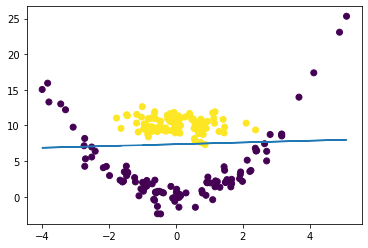

[[40 10]
 [ 1 49]]
Acc = 0.89
Misc rate = 0.10999999999999999
Precision = 0.8
Recall = 0.975609756097561
Spec = 0.8305084745762712


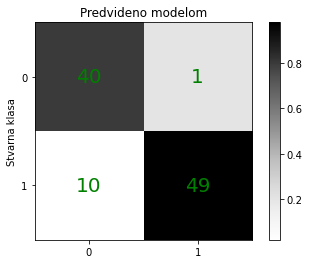

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as linm
import sklearn.metrics as met


def plot_confusion_matrix(c_matrix):
    norm_conf = []
    for i in c_matrix:
        a = 0
        tmp_arr = []
        a = sum(i, 0)
        for j in i:
            tmp_arr.append(float(j) / float(a))
        norm_conf.append(tmp_arr)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    res = ax.imshow(np.array(norm_conf), cmap=plt.cm.Greys, interpolation='nearest')

    width = len(c_matrix)
    height = len(c_matrix[0])

    for x in range(width):
        for y in range(height):
            ax.annotate(str(c_matrix[x][y]), xy=(x, y),
                        horizontalalignment='center',
                        verticalalignment='center', color='green', size=20)

    fig.colorbar(res)
    numbers = '0123456789'
    plt.xticks(range(width), numbers[:width])
    plt.yticks(range(height), numbers[:height])

    plt.ylabel('Stvarna klasa')
    plt.title('Predvideno modelom')
    # plt.show()

def generate_data(n):
    # prva klasa
    n1 = n / 2
    n1 = int(n1)
    x1_1 = np.random.normal(0.0, 2, (n1, 1))
    # x1_1 = .21*(6.*np.random.standard_normal((n1,1)));
    x2_1 = np.power(x1_1, 2) + np.random.standard_normal((n1, 1))
    y_1 = np.zeros([n1, 1])
    temp1 = np.concatenate((x1_1, x2_1, y_1), axis=1)

    # druga klasa
    n2 = n - n / 2
    n2 = int(n2)
    x_2 = np.random.multivariate_normal((0, 10), [[0.8, 0], [0, 1.2]], n2)
    y_2 = np.ones([n2, 1])
    temp2 = np.concatenate((x_2, y_2), axis=1)

    data = np.concatenate((temp1, temp2), axis=0)

    # permutiraj podatke
    indices = np.random.permutation(n)
    data = data[indices, :]

    return data


np.random.seed(242)
train_data = generate_data(200)

x1train = train_data[:, 0]
x2train = train_data[:, 1]
ytrain = train_data[:, 2]
xtrain = train_data[:, 0:2]

np.random.seed(12)
learn_data = generate_data(100)
x1learn = learn_data[:, 0]
x2learn = learn_data[:, 1]
ylearn = learn_data[:, 2]
xlearn = learn_data[:, 0:2]

logreg = linm.LogisticRegression()
logreg.fit(xtrain, ytrain)
logreg.predict(xtrain)
param1 = logreg.intercept_
param2 = logreg.coef_

ypred = logreg.predict(xlearn)
print(ypred)
ycol = []
for i in range(100):
    if int(ylearn[i]) == int(ypred[i]):
        ycol.append('green')
    else:
        ycol.append('black')

plt.figure(2)
plt.scatter(x1train, x2train, c=ytrain)
x2 = (-logreg.intercept_ - logreg.coef_[0][0]*x1train) / logreg.coef_[0][1]
plt.plot(x1train, x2)
plt.show()

conf_mat = met.confusion_matrix(ylearn, ypred)
plot_confusion_matrix(conf_mat)

accuracy = met.accuracy_score(ylearn, ypred)

print(conf_mat)

tp = conf_mat[0][0]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[1][1]

misclass_rate = 1 - accuracy
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn / (tn+fp)

print("Acc = " + str(accuracy))
print("Misc rate = " + str(misclass_rate))
print("Precision = " + str(precision))
print("Recall = " + str(recall))
print("Spec = " + str(specificity))

plt.show()
